In [160]:

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from google.colab.patches import cv2
from google.colab.patches import cv2_imshow


In [ ]:
print(tf.random.normal([100,16]))

tf.Tensor(
[[-0.74766856 -0.3600408   0.5349404  ...  1.7581493   0.0277367
   0.770535  ]
 [-0.222053    0.12187487 -0.21911868 ... -0.01926403  0.22500512
  -0.8437393 ]
 [-0.15990053 -0.41441184 -0.42158085 ...  0.02425964 -1.0869932
  -0.508487  ]
 ...
 [ 0.5545769  -1.7935407  -0.13002904 ...  1.0019784   0.5307633
  -0.54965234]
 [-0.58876956 -0.6814106  -0.9477784  ...  0.39867097  0.9657534
   0.02519829]
 [ 0.82986766 -0.6616077   0.27584872 ... -0.11370642 -0.9945424
   2.5181456 ]], shape=(100, 16), dtype=float32)


In [ ]:
dataset = tf.keras.utils.get_file('prada', 'https://drive.google.com/drive/folders/1vU6GZebGWEbZY3K7YGEKIQBtUpAUyre3?usp=sharing')

 172032/Unknown - 0s 2us/step

In [161]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 0,

    rescale = 1. / 255)

obj = generator.flow_from_directory(
    '/content/drive/My Drive/Prada',
    shuffle=True,
    target_size = (300,180),
    batch_size = 7,
    class_mode = 'binary',
)


"""train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/My Drive/Prada',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(300, 180),
  batch_size=7)


for image_batch, label_batch in train_ds:
  print(image_batch.shape)
  break"""


Found 40 images belonging to 2 classes.


'train_ds = tf.keras.preprocessing.image_dataset_from_directory(\n  \'/content/drive/My Drive/Prada\',\n  validation_split=0.2,\n  subset="training",\n  seed=123,\n  image_size=(300, 180),\n  batch_size=7)\n\n\nfor image_batch, label_batch in train_ds:\n  print(image_batch.shape)\n  break'

In [ ]:
images = np.array([])

for i in range(7):
  img, label = obj.next()
  print(img.shape, i)
  if i==0:
    images = img
  else:
    images = np.append(images,img, axis=0)

#img = obj.next()
"""for idx in range(len(images) - 1):
    img = np.vstack((img, images[idx + 1]))"""
print(images.shape)

(7, 300, 180, 3) 0
(5, 300, 180, 3) 1
(7, 300, 180, 3) 2
(7, 300, 180, 3) 3
(7, 300, 180, 3) 4
(7, 300, 180, 3) 5
(7, 300, 180, 3) 6
(47, 300, 180, 3)


(300, 180, 3)


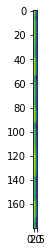

In [ ]:
print(img[0].shape)
for i in enumerate(range(5)): 
  plt.imshow(img[i])

<TakeDataset shapes: ((None, 300, 180, 3), (None,)), types: (tf.float32, tf.int32)>


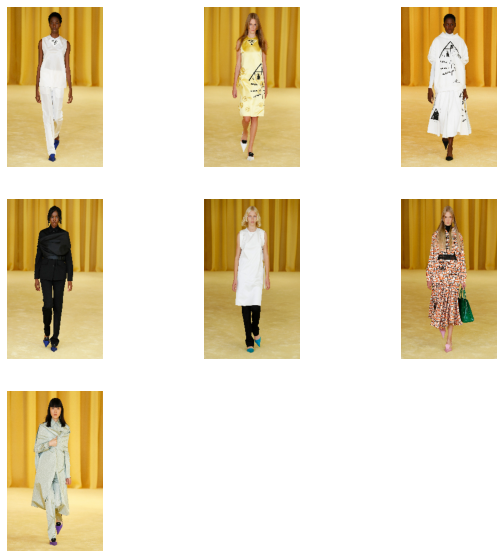

In [ ]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(7):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype('uint8'))

    plt.axis('off')

print(train_ds.take(1))

In [162]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(300,180,3)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(16, kernel_size= 5, strides = (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(32, kernel_size= 5, strides=(3,3),activation='relu'))
model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Reshape((1024,19)))
#model.add(tf.keras.layers.LSTM(100))
model.add(tf.keras.layers.Dense(200))
model.add(tf.keras.layers.Dense(100448))
model.add(tf.keras.layers.Reshape((73, 43, 32)))
model.add(tf.keras.layers.Conv2DTranspose(32, kernel_size = 5, strides = (2,2), activation='relu'))
model.add(tf.keras.layers.Conv2DTranspose(32, kernel_size = 4, strides=(2,2), activation='relu'))
model.add(tf.keras.layers.Conv2DTranspose(3, kernel_size=(1,1)
                                        , strides=(1,1), activation=None))

In [163]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_17 (Batc (None, 300, 180, 3)       12        
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 99, 59, 16)        1216      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 19, 32)        12832     
_________________________________________________________________
flatten_14 (Flatten)         (None, 19456)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 20)                389140    
_________________________________________________________________
reshape_18 (Reshape)         (None, 2, 10)             0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 100)             

In [ ]:
model = tf.keras.models.load_model('/content/drive/My Drive/Colab Notebooks/Pradanator VAE/Whole Model')

In [164]:
model.fit(images, images, epochs=50, verbose=True, batch_size=7, validation_split=0.2, shuffle=True)

Epoch 1/50
6/6 [==============================] - 4s 742ms/step - loss: 3.1499 - val_loss: 1.1304
Epoch 2/50
6/6 [==============================] - 4s 705ms/step - loss: 1.2009 - val_loss: 1.2997
Epoch 3/50
6/6 [==============================] - 4s 707ms/step - loss: 0.9826 - val_loss: 0.8624
Epoch 4/50
6/6 [==============================] - 4s 732ms/step - loss: 0.8218 - val_loss: 0.9242
Epoch 5/50
6/6 [==============================] - 4s 722ms/step - loss: 0.7699 - val_loss: 0.8337
Epoch 6/50
6/6 [==============================] - 4s 727ms/step - loss: 0.7215 - val_loss: 0.8150
Epoch 7/50
6/6 [==============================] - 4s 721ms/step - loss: 0.6845 - val_loss: 0.8327
Epoch 8/50
6/6 [==============================] - 4s 715ms/step - loss: 0.6739 - val_loss: 0.8403
Epoch 9/50
6/6 [==============================] - 4s 712ms/step - loss: 0.6578 - val_loss: 0.9442
Epoch 10/50
6/6 [==============================] - 4s 712ms/step - loss: 0.7769 - val_loss: 1.0596
Epoch 11/50
6/6 [==

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


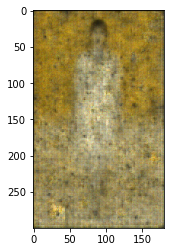

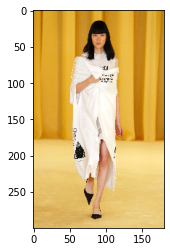

In [165]:
i = 2

result = model.predict(img[i].reshape(1,300,180,3))
plt.imshow(result.reshape(300,180,3))
plt.show()
plt.imshow(img[i])
plt.show()

#for i in range(10):
 # plt.imshow(result[i])
  #plt.show()

In [ ]:
#generator
input = tf.keras.layers.Input(shape=(50,))
#decoder = model.layers[-7](input)
#decoder1 = model.layers[-6](decoder)
decoder2 = model.layers[-5](input)
decoder3 = model.layers[-4](decoder2)
decoder4 = model.layers[-3](decoder3)
decoder5 = model.layers[-2](decoder4)
decoder6 = model.layers[-1](decoder5)

final = tf.keras.Model(inputs = input, outputs = decoder6)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 300, 180, 3)


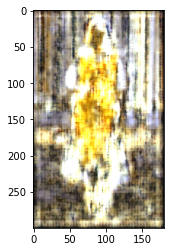

In [ ]:
random = tf.random.normal([1,50])#, mean=0.5, stddev= 0.5)
prediction = final.predict(random)
print(prediction.shape)
prediction = np.reshape(prediction, (300,180,3))


plt.imshow(prediction)